# **Loan approval prediction**

In [1]:
#importing required labraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### **Data Collection**

In [2]:
# loading the csv data to a Pandas DataFrame
df=pd.read_csv("F:\Project\Classification\Loan approval prediction\Copy of loan.csv")


In [3]:
# print first 5 rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# statistical measures about the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# shape of dataset
df.shape

(614, 13)

### **Exploratory Analysis**

### **Analysis of Dependent Variables**

In [7]:
# counting the Loan_Status variable data set
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

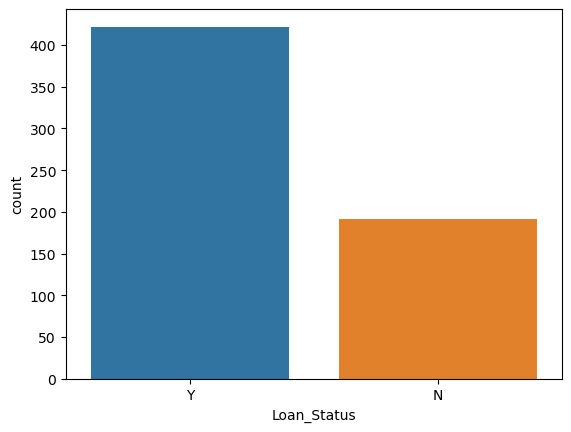

In [8]:
# checking the count distribution of Loan_Status Variable
sns.countplot(x ='Loan_Status', data = df)

This is target column which is imbalance

### **Analysis of Independent Variables**

In [9]:
def get_categorical_continuous_columns(df):
    """
    This function takes a Pandas DataFrame as input and returns two lists - one for the categorical columns
    and one for the continuous columns.
    """
    categorical_columns = []
    continuous_columns = []

    for col in df.columns:
        if df[col].dtype == np.object:  # object dtype indicates categorical columns
            categorical_columns.append(col)
        else:
            continuous_columns.append(col)

    return categorical_columns, continuous_columns


In [10]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [11]:
categorical_cols, continuous_cols = get_categorical_continuous_columns(df)
print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)


Categorical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Continuous Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


### **Loan_ID column Analysis**

In [12]:
df['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [13]:
df['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

It looks like it have all unique values so it will not going to help in prediction

### **Gender column Analysis**

In [14]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
# checking the null values in Gender Variable
df['Gender'].isna().sum()

13

<Axes: xlabel='Gender', ylabel='count'>

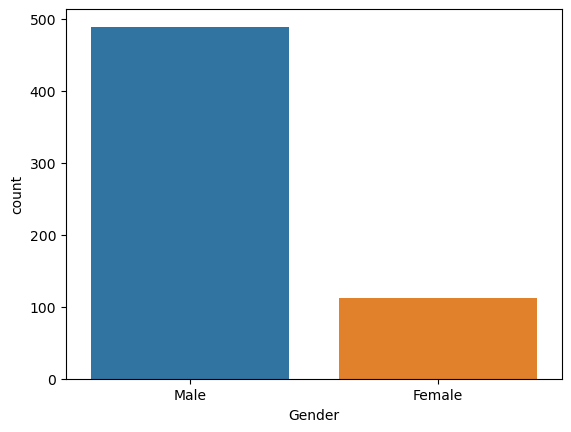

In [16]:
# checking the count distribution of Gender Variable
sns.countplot(x ='Gender', data = df)

Gender column have male count more than female 

In [17]:
# Gender is a categorical variable so we replace all null values with mode
mode_Gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_Gender,inplace=True)

In [18]:
# label encoding on Gender column
df['Gender'] = df['Gender'].replace({"Male":1,"Female":0})

In [19]:
df['Gender'].isna().sum() # now there are no null values are present

0

### **Married column Analysis**

In [20]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<Axes: xlabel='Married', ylabel='count'>

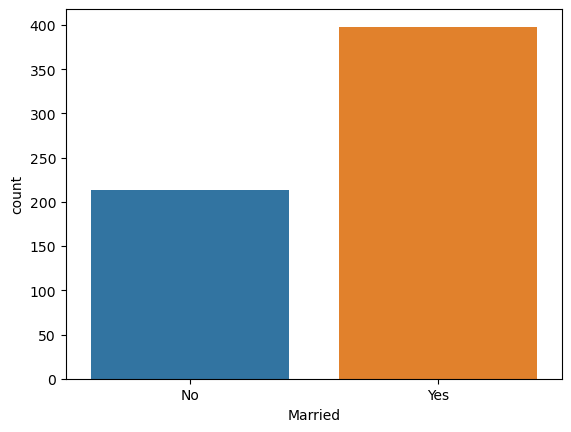

In [21]:
# checking the count distribution of Married Variable
sns.countplot(x ='Married', data = df)

It looks like there are married are more than unmarried

In [22]:
df['Married'].isna().sum() #checking for null values

3

In [23]:
# Married is a categorical variable so we replace all null values with mode
mode_Married = df['Married'].mode()[0]
df['Married'].fillna(mode_Married,inplace=True)

In [24]:
df['Married'].isna().sum() #checking for null values

0

In [25]:
# label encoding on Married column
df['Married'] = df['Married'].replace({"Yes":1,"No":0})

### **Dependents column Analysis**

In [26]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

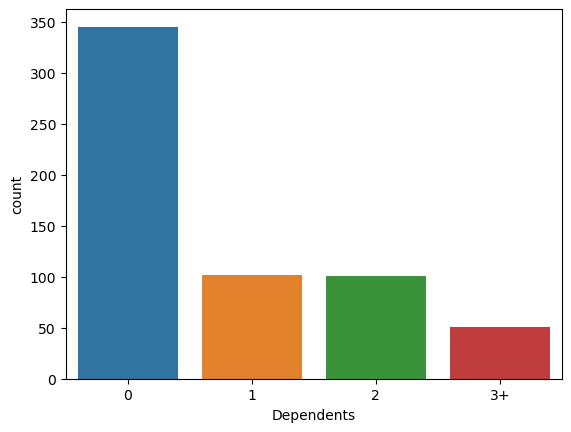

In [27]:
# checking the count distribution of Dependents Variable
sns.countplot(x ='Dependents', data = df)

0 are more as compare to others

In [28]:
df['Dependents'].isna().sum() #checking for null values

15

In [29]:
# Dependents is a categorical variable so we replace all null values with mode
mode_Dependents = df['Dependents'].mode()[0]
df['Dependents'].fillna(mode_Dependents,inplace=True)

In [30]:
df['Dependents'].isna().sum() #checking for null values

0

In [83]:
# label encoding on Dependents column
df['Dependents'] = df['Dependents'].replace({"3+":3})

In [84]:
df['Dependents'] = df['Dependents'].astype(float)

### **Education column Analysis**

In [32]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

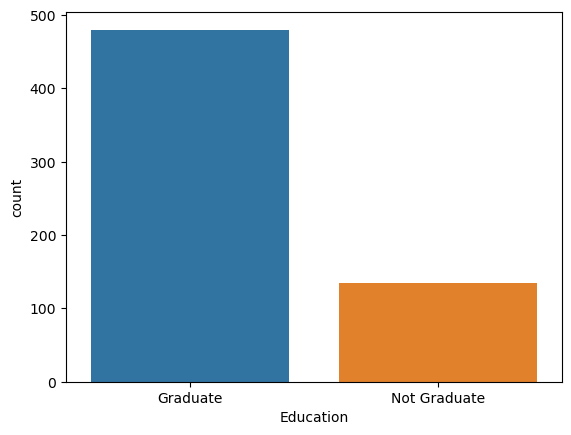

In [33]:
# checking the count distribution of Education Variable
sns.countplot(x ='Education', data = df)

It looks like Graduates are more

In [34]:
df['Education'].isna().sum() #checking for null values

0

In [35]:
# label encoding on Dependents column
df['Education'] = df['Education'].replace({"Graduate":1,"Not Graduate":0})

### **Self_Employed column Analysis**

In [36]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

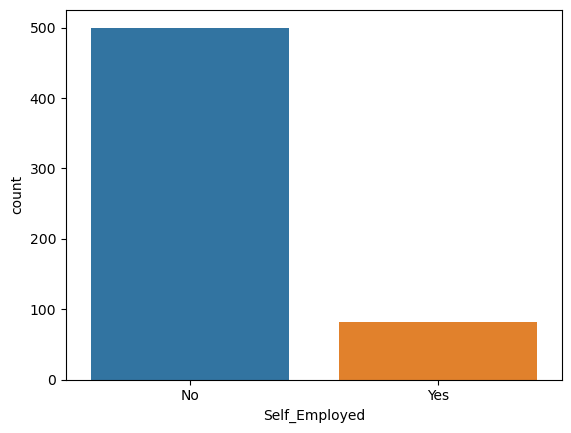

In [37]:
# checking the count distribution of Self_Employed Variable
sns.countplot(x ='Self_Employed', data = df)

The category of no is more

In [38]:
df['Self_Employed'].isna().sum() #checking for null values

32

In [39]:
# Self_Employed is a categorical variable so we replace all null values with mode
mode_Self_Employed = df['Self_Employed'].mode()[0]
df['Self_Employed'].fillna(mode_Self_Employed,inplace=True)

In [40]:
df['Self_Employed'].isna().sum() #checking for null values

0

In [41]:
# label encoding on Self_Employed column
df['Self_Employed'] = df['Self_Employed'].replace({"Yes":1,"No":0})

### **Property_Area column Analysis**

In [42]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<Axes: xlabel='Property_Area', ylabel='count'>

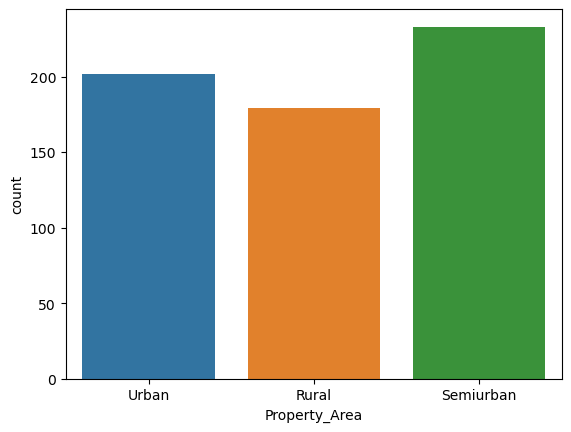

In [43]:
# checking the count distribution of Property_Area Variable
sns.countplot(x ='Property_Area', data = df)

It looks like semiurban have more count as compare to Urban and Rural Property_Area

In [44]:
df['Property_Area'].isna().sum() #checking for null values

0

**Here we have to perform one hot encdoing because it looks like non order data**

In [45]:
df = pd.get_dummies(df,columns=['Property_Area'])

### **ApplicantIncome column Analysis**

In [46]:
df['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [47]:
df['ApplicantIncome'].isna().sum() #checking for null values

0

### **CoapplicantIncome column Analysis**

In [48]:
df['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [49]:
df['ApplicantIncome'].isna().sum() #checking for null values

0

### **LoanAmount column Analysis**

In [50]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [51]:
df['LoanAmount'].isna().sum() #checking for null values

22

So this is contineous column so we have to use 
*  mean (if data normally distributed and no outliers are present)
*  median (if data is skewed and outliers are present)

### **Handling outliers**
To detect outliers there are few techniques:
1.  z-score
2.  IQR
3.  Boxplot
4.  Scatter plot

### **Function to detect ouliers**

In [53]:
# function to detect outliers using z-score
def outlier_detect_zscore(array):
  from scipy import stats
  z_score=stats.zscore(array)
  outlier_list = []
  threshold = 2
  for i in range(len(array)):
    if z_score[i]>threshold:
      outlier_list.append(array[i])
  print(f"Outliers detected using z-score : {outlier_list}")

def outlier_detect_IQR(array):
  outlier_list = []
  Q1 = np.quantile(array,0.25)
  Q3 = np.quantile(array,0.75)
  IQR = Q3-Q1
  lower_tail = Q1-1.5*IQR
  upper_tail = Q3+1.5*IQR
  for i in array:
    if i>upper_tail:
      outlier_list.append(i)
    if i<lower_tail:
      outlier_list.append(i)
  print(f"Outliers detected using IQR : {outlier_list}")

def outlier_detect_Boxplot(array):
  print(f"Outliers detected using Boxplot : \n{sns.boxplot(array)}")

Outliers detected using z-score : []
Outliers detected using IQR : []
Outliers detected using Boxplot : 
Axes(0.125,0.11;0.775x0.77)


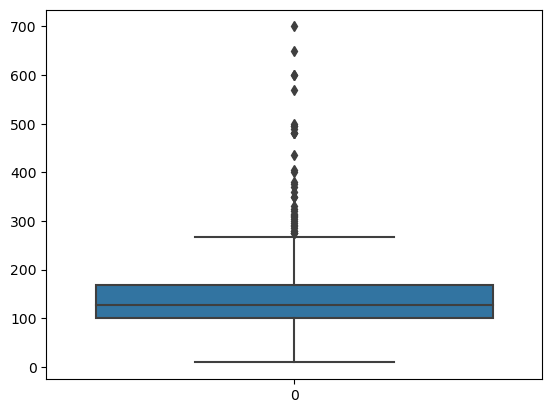

In [58]:
outlier_detect_zscore(df["LoanAmount"])
outlier_detect_IQR(df["LoanAmount"])
outlier_detect_Boxplot(df["LoanAmount"])

No ouliers are present

### **Techniques to find data is normally distributed or not:**
1.   Density plot (kdeplot)
2.   qq plot
3.   Shapiro test
4.   KS-test
5.   Normality test
6.   Skewness of residuel (after model training)

### **Function to detect data is normally distributed or not**

In [59]:
def Normal_distribution_checking_using_Density_plot(array):
  print(f"Normally distribution using Density plot (kdeplot) : \n{sns.kdeplot(array,fill=True)}")

def Normal_distribution_checking_using_qqplot(array):
  import scipy.stats as sts
  import statsmodels.api as sm
  print(f"Normally distribution using qqplot (qqplot) : \n{sm.qqplot(array)}")

def Normal_distribution_checking_using_shapiro_test(array):
  from scipy.stats import shapiro
  _,p_val = shapiro(array)
  if p_val>0.05:
    print('Using shapiro test : Data is normally distributed')
  else:
    print("Using shapiro test : Data is not normally distributed")

def Normal_distribution_checking_using_normaltest(array):
  from scipy.stats import normaltest
  _,p_val = normaltest(array)
  if p_val>0.05:
    print('Using normal test test : Data is normally distributed')
  else:
    print("Using normal test test : Data is not normally distributed")

def Normal_distribution_checking_using_KS_test(array):
  from scipy.stats import kstest
  _,p_val = kstest(array,'norm')
  if p_val>0.05:
    print('Using KS test test : Data is normally distributed')
  else:
    print("Using KS test test : Data is not normally distributed")

Normally distribution using Density plot (kdeplot) : 
Axes(0.125,0.11;0.775x0.77)


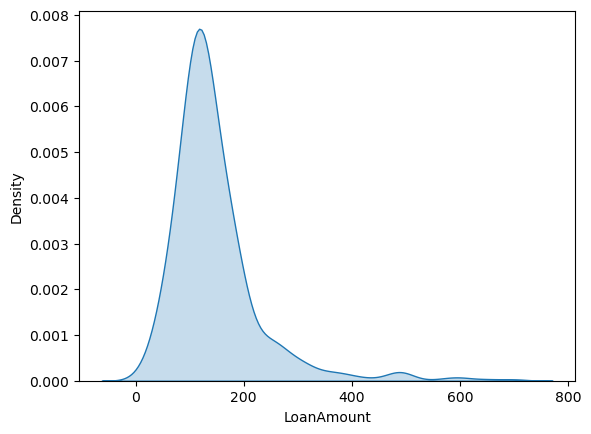

In [60]:
Normal_distribution_checking_using_Density_plot(df["LoanAmount"])

Normally distribution using qqplot (qqplot) : 
Figure(640x480)


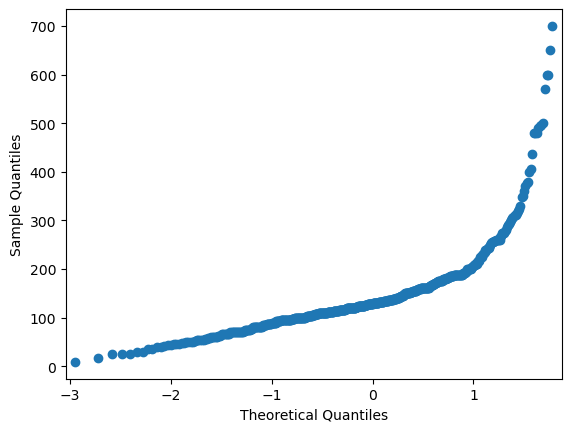

In [62]:
Normal_distribution_checking_using_qqplot(df["LoanAmount"])

In [63]:
Normal_distribution_checking_using_shapiro_test(df["LoanAmount"])

Using shapiro test : Data is normally distributed


In [64]:
Normal_distribution_checking_using_normaltest(df["LoanAmount"])

Using normal test test : Data is not normally distributed


In [65]:
Normal_distribution_checking_using_KS_test(df["LoanAmount"])

Using KS test test : Data is not normally distributed


Data is not normally distributed

**so we will use mean of column to replace null values**

In [68]:
median_LoanAmount = df["LoanAmount"].median()
df['LoanAmount'].fillna(median_LoanAmount,inplace=True)

In [69]:
df['LoanAmount'].isna().sum() #checking for null values

0

### **Loan_Amount_Term column Analysis**

In [70]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

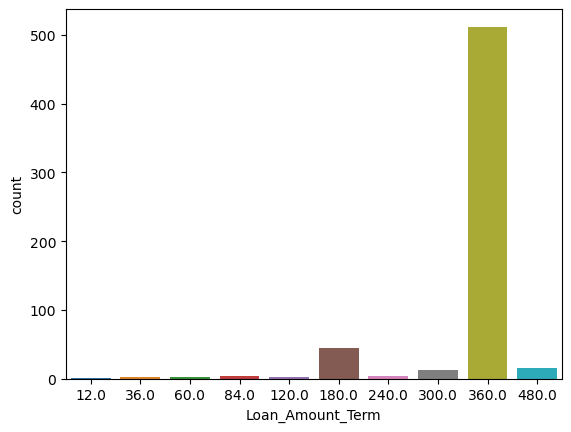

In [71]:
# checking the count distribution of Loan_Amount_Term Variable
sns.countplot(x ='Loan_Amount_Term', data = df)

It looks like a categorical column and have more count of 360.0

In [72]:
df['Loan_Amount_Term'].isna().sum() #checking for null values

14

In [73]:
# Loan_Amount_Term is a categorical variable so we replace all null values with mode
mode_Loan_Amount_Term = df['Loan_Amount_Term'].mode()[0]
df['Loan_Amount_Term'].fillna(mode_Loan_Amount_Term,inplace=True)

In [74]:
df['Loan_Amount_Term'].isna().sum() #checking for null values

0

### **Credit_History column Analysis**

In [75]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

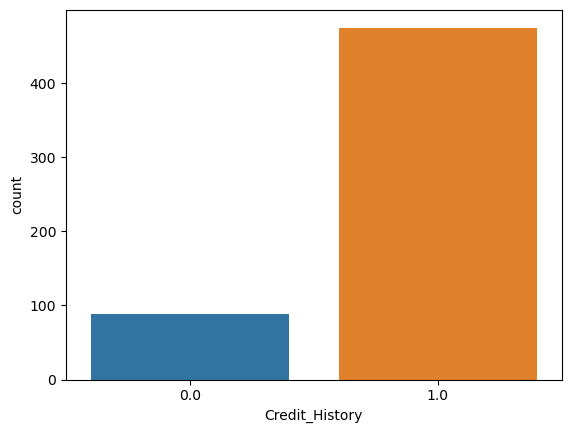

In [76]:
# checking the count distribution of Loan_Amount_Term Variable
sns.countplot(x ='Credit_History', data = df)

Count of 1 is more as compare to 0

In [77]:
df['Credit_History'].isna().sum() #checking for null values

50

In [78]:
# Loan_Amount_Term is a categorical variable so we replace all null values with mode
mode_Credit_History = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(mode_Credit_History,inplace=True)

In [79]:
df['Credit_History'].isna().sum() #checking for null values

0

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Dependents               614 non-null    float64
 4   Education                614 non-null    int64  
 5   Self_Employed            614 non-null    int64  
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    float64
 10  Credit_History           614 non-null    float64
 11  Loan_Status              614 non-null    object 
 12  Property_Area_Rural      614 non-null    uint8  
 13  Property_Area_Semiurban  614 non-null    uint8  
 14  Property_Area_Urban      6

we will drop Loan_ID column

In [89]:
df = df.drop('Loan_ID',axis=1)

In [90]:
df.isna().sum() #checking for null values

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

**Now there is no null values and data is ready to pass to model for prediction**

In [91]:
df.to_csv('clean_data.csv', index=False) # clean data csv file is created